In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_results = pd.read_csv("raw_results.csv")

In [3]:
raw_results.groupby(["Dataset", "Method", "Percentage"]).mean().to_csv("agg_mean_results.csv")
raw_results.groupby(["Dataset", "Method", "Percentage"]).std().to_csv("agg_std_results.csv")

In [4]:
df = pd.read_csv("agg_mean_results.csv")
datasets = df['Dataset'].unique()
methods = df['Method'].unique()

<ipython-input-5-3fefd4d42ef8>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 3, idx + 1)
<ipython-input-5-3fefd4d42ef8>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 3, idx + 1)
<ipython-input-5-3fefd4d42ef8>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be c

<ipython-input-5-3fefd4d42ef8>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 3, idx + 1)
<ipython-input-5-3fefd4d42ef8>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 3, idx + 1)
<ipython-input-5-3fefd4d42ef8>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be c

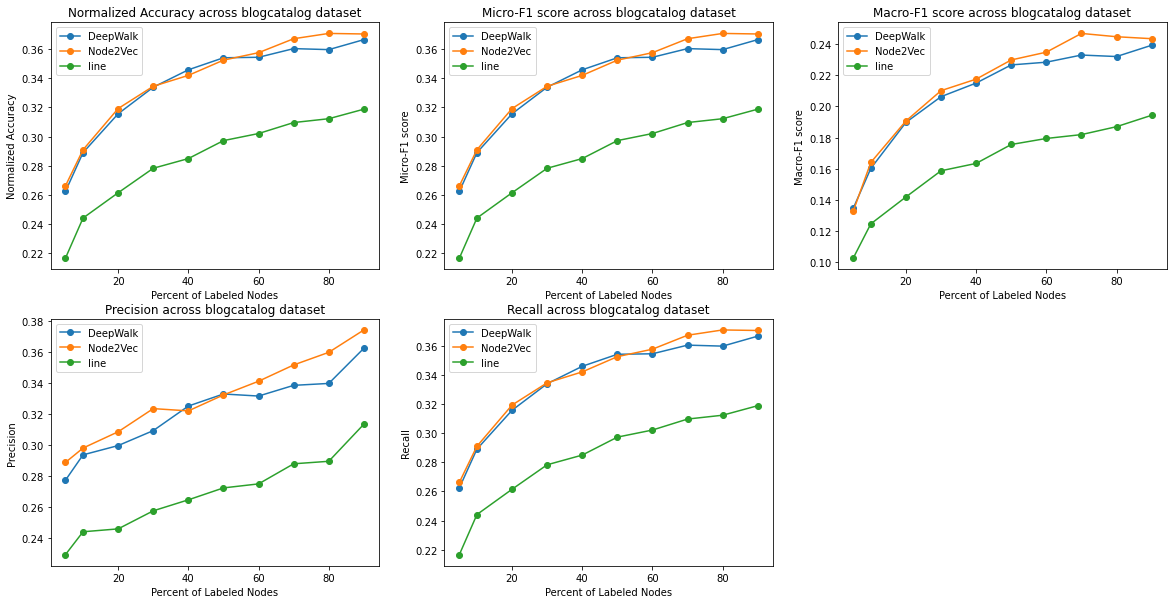

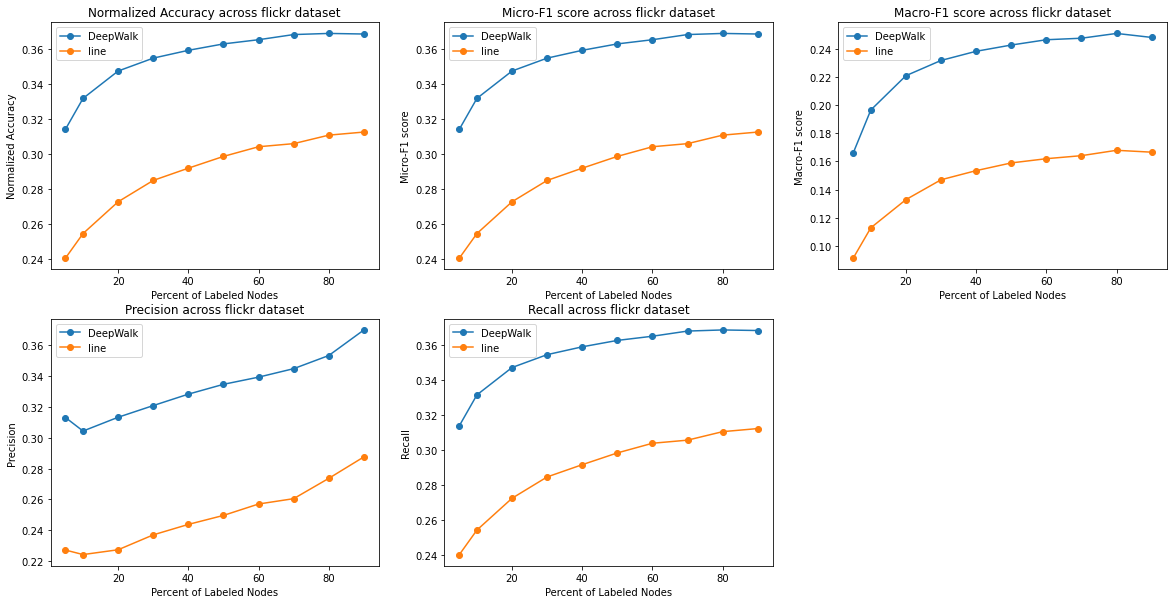

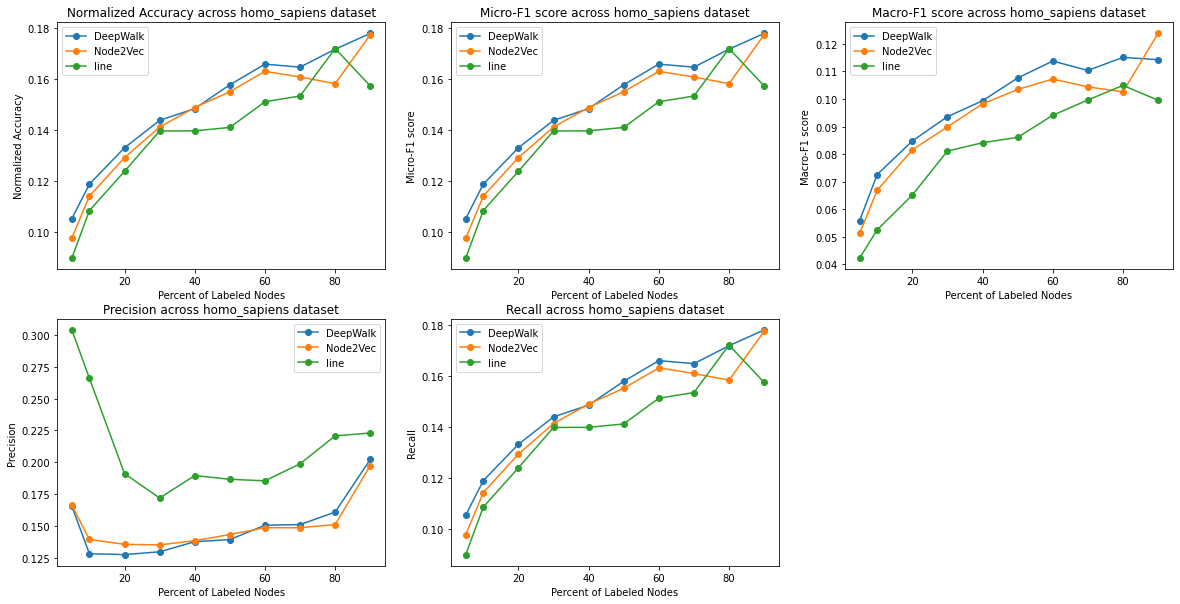

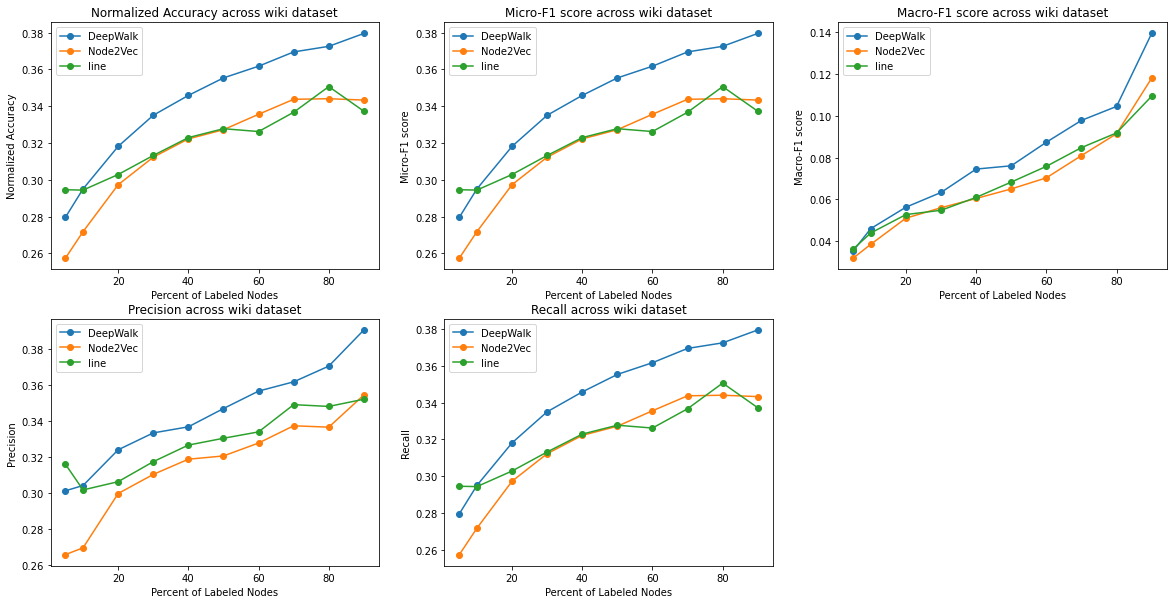

In [5]:
%matplotlib inline
name_to_column = {"Normalized Accuracy" : "accuracy_norm", 
                  "Micro-F1 score" : "f1_score_micro", 
                  "Macro-F1 score": "f1_score_macro",
                  "Precision": "precision",
                  "Recall": "recall"}

metric = "Normalized Accuracy"

for dataset in datasets:
    plt.figure(figsize=(20, 10))
    for method in methods:
        for idx, metric in enumerate(name_to_column.keys()):
            plt.subplot(2, 3, idx + 1)
            plt.ylabel(metric)
            plt.xlabel("Percent of Labeled Nodes")
            method_df = df[df['Dataset'] == dataset]
            plt.title("{} across {} dataset".format(metric, dataset))
            specific = method_df[method_df['Method'] == method]
            metric_col = specific[name_to_column[metric]]
            if len(metric_col):
                plt.plot(specific.Percentage, metric_col, label=method, marker='o')
            plt.legend()
        plt.savefig("metric_figures/{}".format(dataset.lower()), dpi=500)

In [6]:
df = pd.read_csv("timestats.csv")

In [12]:
df[(df["Dataset"] == "blogcatalog") & (df["Method"] == "DeepWalk")]

,Dataset,Method,time,Nodes,Edges,Edge Density
0,blogcatalog,DeepWalk,1190.324242,10312,333983,64.775601


In [13]:
df

,Dataset,Method,time,Nodes,Edges,Edge Density
0,blogcatalog,DeepWalk,1190.324242,10312,333983,64.775601
1,flickr,DeepWalk,11418.323510,80513,5899882,146.557252
2,homo_sapiens,DeepWalk,428.133839,3890,38292,19.687404
3,wiki,DeepWalk,482.372049,4777,92406,38.687879
4,blogcatalog,line,181.103308,10312,333983,64.775601
5,flickr,line,31916.152690,80513,5899882,146.557252
6,homo_sapiens,line,10.101041,3890,38292,19.687404
7,wiki,line,26.655175,4777,92406,38.687879
8,blogcatalog,Node2Vec,6748.351669,10312,333983,64.775601
9,homo_sapiens,Node2Vec,206.807465,3890,38292,19.687404
